# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# import dataset

In [2]:
column_names=["user_id","item_id","rating","timestamp"]
df=pd.read_csv('ml-100k/u.data',sep='\t',names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
df.columns

Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [8]:
df_2=pd.read_csv('ml-100k/u.item',sep="\|",header=None,encoding='latin-1')

In [9]:
df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df.user_id.nunique()

943

In [11]:
df_2.iloc[:,0].nunique()

1682

In [12]:
df.item_id.nunique()

1682

In [13]:
df_2.iloc[:,0:2].head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
df_2=df_2.iloc[:,0:2]

In [15]:
df_2.columns=['item_id',"item_name"]

In [16]:
df_2.head()

,item_id,item_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [17]:
final_df=pd.merge(df,df_2,on="item_id")

In [18]:
final_df.head()

,user_id,item_id,rating,timestamp,item_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [19]:
final_df.drop(columns='timestamp',inplace=True)

In [20]:
final_df.head()

,user_id,item_id,rating,item_name
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [21]:
final_df.item_name.nunique()

1664

In [22]:
final_df.isnull().sum()

user_id      0
item_id      0
rating       0
item_name    0
dtype: int64

# Data Visualisation

<AxesSubplot:xlabel='rating', ylabel='count'>

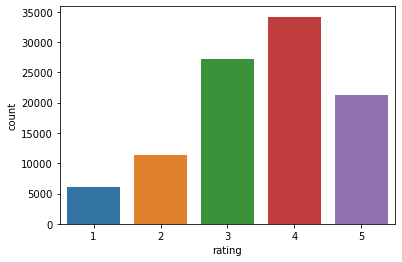

In [134]:
sns.countplot(x=final_df['rating'],)

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'item_id'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>]],
      dtype=object)

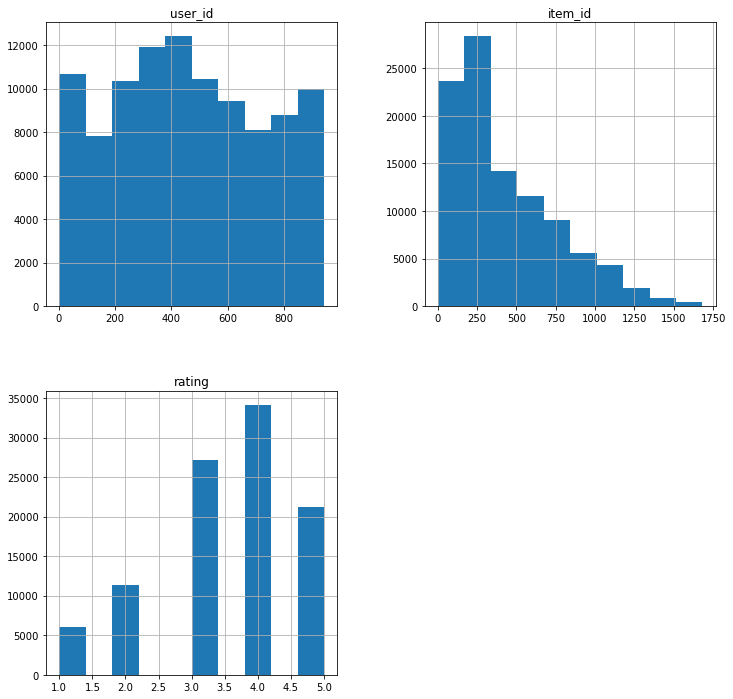

In [136]:
final_df.hist(figsize=(12,12))

In [137]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='user_id', ylabel='user_id'>,
        <AxesSubplot:xlabel='item_id', ylabel='user_id'>,
        <AxesSubplot:xlabel='rating', ylabel='user_id'>],
       [<AxesSubplot:xlabel='user_id', ylabel='item_id'>,
        <AxesSubplot:xlabel='item_id', ylabel='item_id'>,
        <AxesSubplot:xlabel='rating', ylabel='item_id'>],
       [<AxesSubplot:xlabel='user_id', ylabel='rating'>,
        <AxesSubplot:xlabel='item_id', ylabel='rating'>,
        <AxesSubplot:xlabel='rating', ylabel='rating'>]], dtype=object)

<Figure size 1440x1440 with 0 Axes>

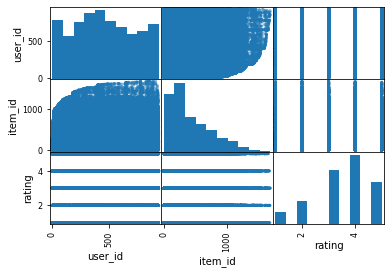

In [139]:
plt.figure(figsize=(20,20))
scatter_matrix(final_df)

<AxesSubplot:xlabel='rating'>

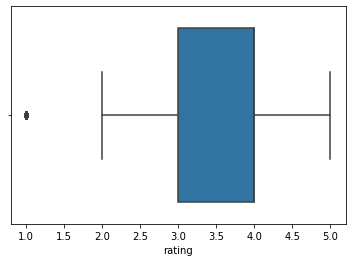

In [140]:
sns.boxplot(x=final_df['rating'])

In [23]:
final_df.groupby('item_name').mean()['rating']

item_name
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [24]:
final_df.groupby('item_name').count()['rating']

item_name
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [25]:
movies=pd.DataFrame(final_df.groupby('item_name').mean()['rating']
                   )

In [26]:
movies.head()

,rating
item_name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [27]:
movies['no_of_peoples_rate']=final_df.groupby('item_name').count()['rating']

In [28]:
movies.sort_values(by='no_of_peoples_rate')

,rating,no_of_peoples_rate
item_name,,
Á köldum klaka (Cold Fever) (1994),3.000000,1
Mille bolle blu (1993),1.000000,1
Mat' i syn (1997),1.000000,1
Marlene Dietrich: Shadow and Light (1996),5.000000,1
"Man from Down Under, The (1943)",1.000000,1
...,...,...
Liar Liar (1997),3.156701,485
Return of the Jedi (1983),4.007890,507
Fargo (1996),4.155512,508


In [29]:
movies=movies[movies['no_of_peoples_rate']>6]

In [30]:
movies.head()

,rating,no_of_peoples_rate
item_name,,
'Til There Was You (1997),2.333333,9
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93


In [77]:
movies.index

Index([''Til There Was You (1997)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '39 Steps, The (1935)', '8 1/2 (1963)', 'A Chef in Love (1996)',
       ...
       'Wonderful, Horrible Life of Leni Riefenstahl, The (1993)',
       'Wonderland (1997)', 'Wrong Trousers, The (1993)', 'Wyatt Earp (1994)',
       'Year of the Horse (1997)', 'Young Frankenstein (1974)',
       'Young Guns (1988)', 'Young Guns II (1990)',
       'Young Poisoner's Handbook, The (1995)', 'unknown'],
      dtype='object', name='item_name', length=1253)

In [31]:
movies.shape

(1253, 2)

In [112]:
movie_cor=final_df.pivot_table(columns='item_name',index='user_id',values='rating')

In [113]:
movie_cor

item_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
movies['correlation']=movie_cor.corrwith(movie_cor['2 Days in the Valley (1996)'])

In [117]:
movies

,rating,no_of_peoples_rate,correlation
item_name,,,
'Til There Was You (1997),2.333333,9,0.522233
101 Dalmatians (1996),2.908257,109,0.048973
12 Angry Men (1957),4.344000,125,0.256625
187 (1997),3.024390,41,0.596644
2 Days in the Valley (1996),3.225806,93,1.000000
...,...,...,...
Young Frankenstein (1974),3.945000,200,0.064559
Young Guns (1988),3.207921,101,0.156220
Young Guns II (1990),2.772727,44,0.132017


In [127]:
movies.dropna(inplace=True)

In [128]:
movies[movies['no_of_peoples_rate']>100].sort_values(by='correlation',ascending=False)

,rating,no_of_peoples_rate,correlation
item_name,,,
Kolya (1996),3.991453,117,0.813117
"Deer Hunter, The (1978)",3.833333,120,0.747231
North by Northwest (1959),4.284916,179,0.685692
"Bridge on the River Kwai, The (1957)",4.175758,165,0.611329
Ulee's Gold (1997),3.760870,184,0.603583
...,...,...,...
Father of the Bride Part II (1995),2.898438,128,-0.195214
Army of Darkness (1993),3.431034,116,-0.205339
Under Siege (1992),3.290323,124,-0.321626


In [129]:
def movie_recomm(name):
    movies['correlation']=movie_cor.corrwith(movie_cor[name])
    movies.dropna(inplace=True)
    rec_movies=movies[movies['no_of_peoples_rate']>100].sort_values(by='correlation',ascending=False)
    
    return rec_movies

In [131]:
movie_recomm('Titanic (1997)').head()

,rating,no_of_peoples_rate,correlation
item_name,,,
Titanic (1997),4.245714,350,1.000000
"River Wild, The (1994)",3.143836,146,0.497600
"Abyss, The (1989)",3.589404,151,0.472103
Bram Stoker's Dracula (1992),3.158333,120,0.443560
True Lies (1994),3.562500,208,0.435104
